In [5]:
#importing required packages
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
#step 1- Collecting data
df = pd.read_csv('sms_spam.csv')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#importing stopwords from nltk library
stopWords = stopwords.words('english')
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
#Cleaning the dataset like removing numbers,punctuation,stopword and converting it into lower case
def processData(text):
        
        nonpuc = [char for char in text if char not in string.punctuation]
        nonpuc = ''.join(nonpuc)
        
        clean_words = [word for word in nonpuc.split() if word.lower() not in stopWords]
        
        clean_words = [word for word in clean_words if word.isalpha()]
        
        return clean_words

In [12]:
df['text'].head().apply(processData)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, wkly, comp, win, FA, Cup, final,...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [13]:
#convert a collection of text to a matrix of tokens
message_bow = CountVectorizer(analyzer=processData).fit_transform(df['text'])

In [14]:
#split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(message_bow,df['type'],
                                                    test_size=0.25)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object


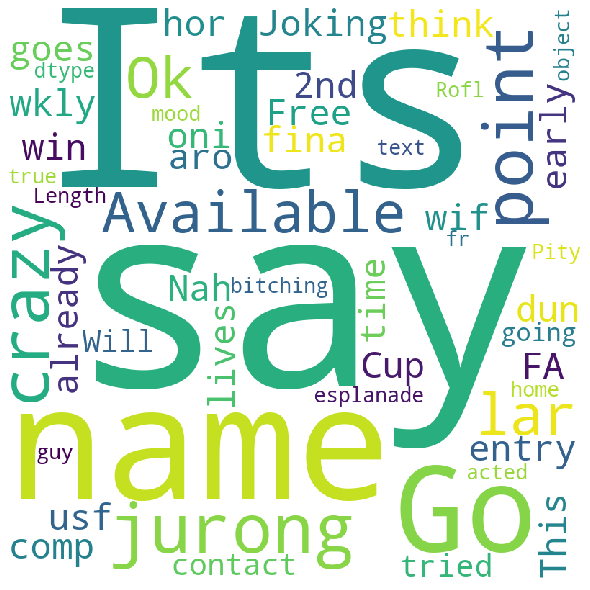

In [30]:
print(str(df['text']))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(df['text'])) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

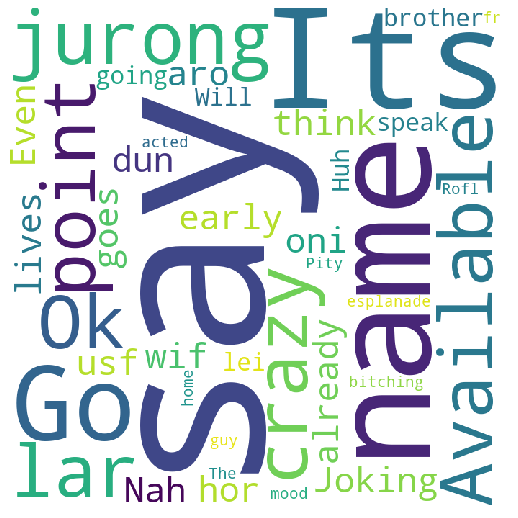

In [38]:
#visualizing Ham words
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white',
                max_words= 40,
                min_font_size = 10).generate(str(df['text'][df['type'].str.match('ham')])) 
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

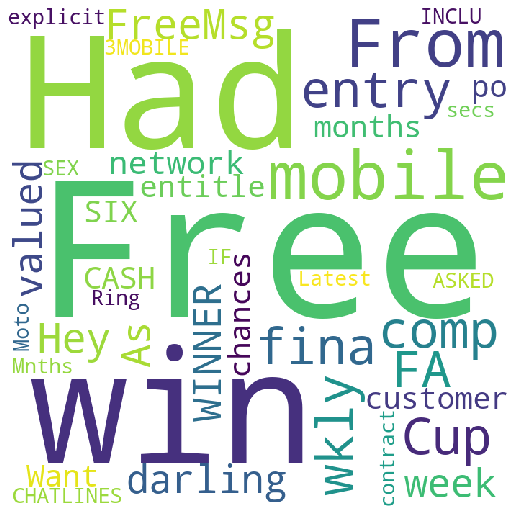

In [39]:
#visualizing Spam words
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white',
                max_words= 40,
                min_font_size = 10).generate(str(df['text'][df['type'].str.match('spam')])) 
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [59]:
#create and train naive bayes model
classifier = MultinomialNB().fit(X_train, y_train)

In [60]:
#print the predictions
print(classifier.predict(X_train))

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [61]:
#evaluate the performance of model on training data set
pred = classifier.predict(X_train)
print('confusion matrix: \n', confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))
print('Accuracy: ', accuracy_score(y_train, pred))

confusion matrix: 
 [[3591   15]
 [   9  565]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3606
        spam       0.97      0.98      0.98       574

    accuracy                           0.99      4180
   macro avg       0.99      0.99      0.99      4180
weighted avg       0.99      0.99      0.99      4180

Accuracy:  0.9942583732057416


In [56]:
#predeicting on test dataset
classifier = MultinomialNB(alpha=0.5).fit(X_test, y_test)

In [57]:
print(classifier.predict(X_test))

['ham' 'ham' 'spam' ... 'spam' 'ham' 'ham']


In [58]:
pred = classifier.predict(X_test)
print('confusion matrix: \n', confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('Accuracy: ', accuracy_score(y_test, pred))

confusion matrix: 
 [[1220    1]
 [   4  169]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1221
        spam       0.99      0.98      0.99       173

    accuracy                           1.00      1394
   macro avg       1.00      0.99      0.99      1394
weighted avg       1.00      1.00      1.00      1394

Accuracy:  0.996413199426112
